# Перцептрон
Цель работы
Познакомиться с перцептроном как с моделью обучения с учителем в библиотеке sklearn.

Содержание работы
Сгенерируйте данные и обучите на них модель перцептрона.
Просмотрите параметры модели, визуализируйте и улучшите ее работу.
Методические указания
Для тренировки работы с перцептроном создадим набор данных. Воспользуемся уже знакомыми функциями генерации данных. Сразу после создания визуализируем этот набор данных на диаграмме рассеяния:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

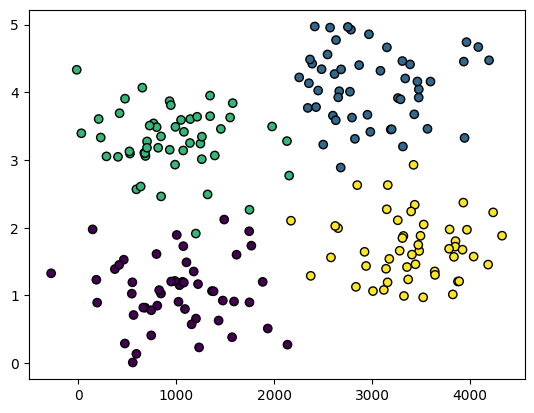

In [3]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)

In [6]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [7]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [8]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]], dtype=int64)

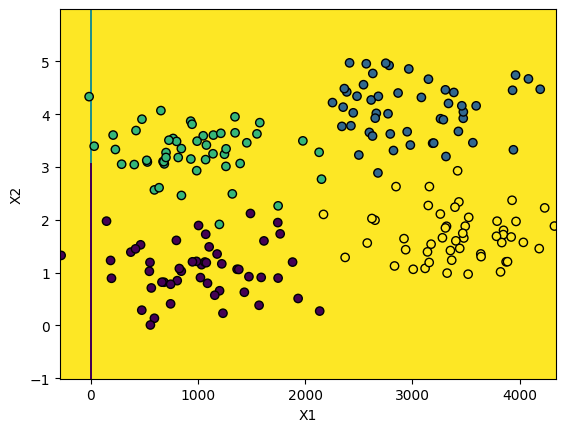

In [11]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# 1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами

In [ ]:

from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Генерация данных
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, centers=blob_centers, cluster_std=0.5, random_state=0)
X[:, 0] *= 1000

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Модели с разным числом нейронов
neurons = [1, 2, 10, 100]
accuracies = {}

for n in neurons:
    clf = MLPClassifier(hidden_layer_sizes=(n,), max_iter=1000, random_state=1)
    clf.fit(X_scaled, y)
    y_pred = clf.predict(X_scaled)
    accuracies[n] = accuracy_score(y, y_pred)

# Результаты
accuracies


C:\Users\alesh\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\alesh\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{1: 0.25, 2: 0.77, 10: 0.98, 100: 0.995}

# 2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

In [2]:

# Задание 2: Создайте и оцените модель с разным количеством скрытых слоев
layers_configurations = [(6,), (6, 6), (6, 6, 6), (6, 6, 6, 6, 6)]
layer_accuracies = {}

for config in layers_configurations:
    clf = MLPClassifier(hidden_layer_sizes=config, max_iter=1000, random_state=1)
    clf.fit(X_scaled, y)
    y_pred = clf.predict(X_scaled)
    layer_accuracies[config] = accuracy_score(y, y_pred)

# Результаты
layer_accuracies


C:\Users\alesh\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\alesh\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{(6,): 0.965, (6, 6): 0.99, (6, 6, 6): 0.985, (6, 6, 6, 6, 6): 0.99}

# 3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

In [ ]:
deep_model = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=1000, random_state=1)
deep_model.fit(X_scaled, y)

# Веса
weights = deep_model.coefs_
biases = deep_model.intercepts_
weights, biases


C:\Users\alesh\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


([array([[-0.5574074 ,  0.65391226, -1.16061696, -0.47582846, -0.95940465,
          -0.88261862],
         [-1.01753513, -0.88370439, -0.78875797,  0.07835462, -0.10579928,
          -0.06859193]]),
  array([[-0.48346346,  0.61248263,  0.75113387,  1.05746048, -0.58793758,
           0.14980019],
         [ 1.1035899 ,  1.31432851, -0.70413062, -0.0554689 , -0.62683424,
           1.02179045],
         [-1.30484839, -1.05033728,  1.07423638,  0.49929732,  0.13859161,
          -0.31603296],
         [ 0.44400729,  0.01802489, -0.28839686,  0.88855346,  0.85558771,
           0.19719106],
         [-1.1694467 ,  0.44516677, -0.48573856,  0.54250697,  0.72014282,
          -0.48765561],
         [-1.12835618, -0.62583483, -0.58244902,  0.81916079, -0.18249004,
          -0.53541556]]),
  array([[-7.67952891e-01,  5.04290368e-01,  5.52983137e-04,
           3.20400332e-01, -1.37636232e+00,  1.54143445e-02],
         [ 1.07588468e-01,  6.78592679e-01,  6.62061755e-02,
           1.0159917

# 4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

In [4]:
import time

start_time = time.time()
complex_model = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=1)
complex_model.fit(X_scaled, y)
end_time = time.time()

complex_model_time = end_time - start_time
complex_model_accuracy = accuracy_score(y, complex_model.predict(X_scaled))
complex_model_time, complex_model_accuracy


(0.7579951286315918, 0.99)

# 5. Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [5]:
from sklearn.datasets import load_iris
data = load_iris()
X_iris, y_iris = data.data, data.target

# Нормализация данных
X_iris_scaled = scaler.fit_transform(X_iris)

# Модель
iris_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=1)
iris_model.fit(X_iris_scaled, y_iris)
iris_accuracy = accuracy_score(y_iris, iris_model.predict(X_iris_scaled))
iris_accuracy


0.9666666666666667

# 6. Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neural_network import MLPClassifier

# Загрузка данных
data = load_diabetes()
X_diabetes, y_diabetes = data.data, data.target

# Нормализация данных
scaler = StandardScaler()
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

# Бинаризация целевой переменной
y_binary = (y_diabetes > y_diabetes.mean()).astype(int)

# Модель
regression_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=1)
regression_model.fit(X_diabetes_scaled, y_binary)

# Предсказание
y_pred_diabetes = regression_model.predict(X_diabetes_scaled)

# Оценка модели
regression_error = mean_squared_error(y_binary, y_pred_diabetes)
accuracy = accuracy_score(y_binary, y_pred_diabetes)

print(f"Mean Squared Error: {regression_error:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Mean Squared Error: 0.2036
Accuracy: 0.7964



# Ответы на контрольные вопросы

1. Что называют глубокой нейронной сетью? 
   Глубокой нейронной сетью называют нейронную сеть с двумя и более скрытыми слоями.

2. Что такое архитектура нейронной сети?
   Архитектура сети — это структура нейронной сети, включающая количество слоев, нейронов в каждом слое и типы связей между ними.

3. Как количество нейронов и слоев влияет на качество моделирования? 
   Увеличение количества нейронов и слоев может повысить способность сети моделировать сложные зависимости, но может привести к переобучению и увеличению времени обучения.

4. Как нейронная сеть решает задачи множественной классификации? 
   Для решения задач множественной классификации нейронная сеть использует выходной слой с количеством нейронов, равным числу классов, и функцию активации softmax.

5. В каких случаях следует применять перцептрон?
   Перцептрон применяют для задач классификации и регрессии, когда важны скорость обучения и интерпретируемость модели.
